## **Description of Columns in the Dataset**


**PasengerID** - Unique id of each passengers

**Survived** - Survival (0 = No; 1 = Yes)

**Pclass**- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

**name** - Name

**sex**- Sex

**age** - Age

**sibsp** - Number of Siblings/Spouses Aboard

**parch** - Number of Parents/Children Aboard

**ticket** - Ticket Number

**fare**- Passenger Fare

**cabin**- Cabin

**embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
#Importing Data set
tit_train = pd.read_csv('/content/drive/MyDrive/my code/tit_train.csv')

tit_test = pd.read_csv('/content/drive/MyDrive/my code/tit_test.csv')




In [50]:
submission_titanic = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

In [3]:
tit_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
tit_train.shape

(891, 12)

In [ ]:
tit_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
tit_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the train data set Cabin has lot of missing values hence cabin column can be ignored. Missing values in the "Age" column is replaced by the mean of age and Emabarked has only 2 missing values it is replaced my most frequent embarked.

In [4]:
tit_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

From the test data set Cabin has lot of missing values hence cabin column can be ignored. Missing values in the "Age" column is replaced by the mean of age andFare has only one missing values which is also replaced by mean on fare column

In [3]:
#Removing ticket, name and cabon columns
tit_train.drop(columns=["Name", "PassengerId","Cabin","Ticket"], inplace=True, axis=1)
tit_test.drop(columns=["Name", "PassengerId","Cabin","Ticket"], inplace=True, axis=1)
tit_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
#filling Age column with mean values
mean= tit_train["Age"].mean()
tit_train["Age"].fillna(mean, inplace=True)

#filling Embarked missing value with S as it is most occured one
tit_train["Embarked"].fillna('S', inplace=True)

tit_train.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [5]:
mean= tit_test["Age"].mean()
tit_test["Age"].fillna(mean, inplace=True)


mean1= tit_test["Fare"].mean()
tit_test["Fare"].fillna(mean1, inplace=True)

tit_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
tit_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
tit_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# ***Data Visulization***

             PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  ... -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000  ...  0.083081  0.018443 -0.549500
Age             0.033207 -0.069809 -0.331339  ... -0.232625 -0.179191  0.091566
SibSp          -0.057527 -0.035322  0.083081  ...  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443  ...  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  ...  0.159651  0.216225  1.000000

[7 rows x 7 columns]


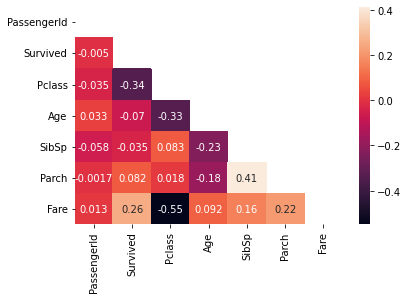

In [ ]:
#first lets find correlation between the variables
print(tit_train.corr())
# Generate a mask for upper traingle

mask = np.triu(np.ones_like(tit_train.corr(), dtype=bool))
sns.heatmap(tit_train.corr(),annot=True, mask=mask)
plt.show()

**Observation:**
* Survival variable is positively correlated with Parch, Fare.
* SibSp is positively correlated with Pclass
* Parch is positively correlate with Survival and SibSp
* Fare is more positively correlated with Survived, SibSp and Parch
* Embarked is more positively correlated with Pclass.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


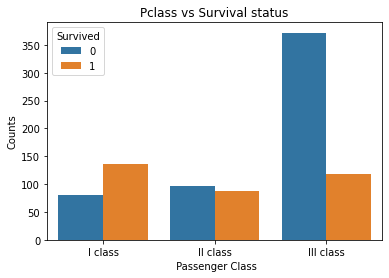

In [ ]:
#Lets visualize all the fetures with respect to survival variabl.
x=[0,1,2]
sns.countplot("Pclass",  hue="Survived", data= tit_train)
lablel=("I class", "II class", "III class")
plt.xlabel(" Passenger Class")
plt.ylabel("Counts")
plt.xticks(x,lablel)
plt.title("Pclass vs Survival status")
plt.show()



Observation: 

From above we can say that More number of passengers who were in class 3 have lost their lives. But number of passengers who survived are more from class 1 compared to other 2 classes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


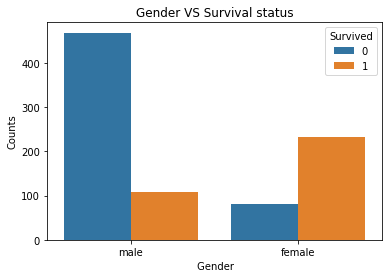

In [ ]:

sns.countplot("Sex", hue="Survived", data= tit_train)
#lablel=("I class", "II class", "III class")
plt.xlabel(" Gender")
plt.ylabel("Counts")
#plt.xticks(x,lablel)
plt.title("Gender VS Survival status")
plt.show()

Observation:

From above plot it's clear that male who lost their lives is almost double of the female passengers who survived. 
If we see there were totally more Male passengers as compare to female passengers  who were travelling and most of male passengers lost their lives


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


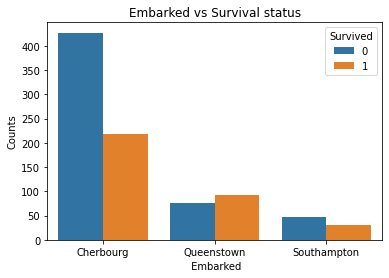

In [ ]:
x=[0,1,2]
sns.countplot("Embarked",  hue="Survived", data= tit_train)
lablel=( "Cherbourg" , "Queenstown", "Southampton")
plt.xlabel(" Embarked")
plt.ylabel("Counts")
plt.xticks(x,lablel)
plt.title("Embarked vs Survival status")
plt.show()

Observation:        

Lot of Passengers who started their journey from Cherbourg have lost their lives. We can also say that the number of passengers who are from Cherbourg are very large compared to other 2 Embark.

**Featurization**

In [6]:
#replacing all categorical features into numercal features
#for Sex columns, replace male: 1, female:0

train_data=pd.get_dummies(tit_train["Pclass"],columns="Pclass")
train_data=train_data.rename({1:"1st Pclass",2:"2nd Pclass", 3:"3rd Pclass"}, axis=1)

train_data["1st Pclass"]=train_data["1st Pclass"].astype(int)
train_data["2nd Pclass"]=train_data["2nd Pclass"].astype(int)
train_data["3rd Pclass"]=train_data["3rd Pclass"].astype(int)


tit_train["Sex"].replace({'male':1,'female':0}, inplace=True)

tit_train["Embarked"].replace({'C':1,'Q':2, 'S':3}, inplace=True)

final_train_data=pd.concat([tit_train,train_data], axis=1)

final_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1st Pclass,2nd Pclass,3rd Pclass
0,0,3,1,22.0,1,0,7.2500,3,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,3,0,0,1
3,1,1,0,35.0,1,0,53.1000,3,1,0,0
4,0,3,1,35.0,0,0,8.0500,3,0,0,1


In [7]:
#replacing all categorical features into numercal features
#for Sex columns, replace male: 1, female:0

test_data=pd.get_dummies(tit_test["Pclass"],columns="Pclass")
test_data=test_data.rename({1:"1st Pclass",2:"2nd Pclass", 3:"3rd Pclass"}, axis=1)
#test_data1=pd.get_dummies(tit_train["Embarked"],columns="Embarked")

test_data["1st Pclass"]=test_data["1st Pclass"].astype(int)
test_data["2nd Pclass"]=test_data["2nd Pclass"].astype(int)
test_data["3rd Pclass"]=test_data["3rd Pclass"].astype(int)

tit_test["Sex"].replace({'male':1,'female':0}, inplace=True)

tit_test["Embarked"].replace({'C':1,'Q':2, 'S':3}, inplace=True)

final_test_data=pd.concat([tit_test,test_data], axis=1)

final_test_data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1st Pclass,2nd Pclass,3rd Pclass
0,3,1,34.5,0,0,7.8292,2,0,0,1
1,3,0,47.0,1,0,7.0000,3,0,0,1
2,2,1,62.0,0,0,9.6875,2,0,1,0
3,3,1,27.0,0,0,8.6625,3,0,0,1
4,3,0,22.0,1,1,12.2875,3,0,0,1


In [8]:
final_train_data['small family']=np.where((final_train_data['SibSp']<=2) & (final_train_data['SibSp']!=0),1,0)
final_test_data['small family']=np.where((final_test_data['SibSp']<=2) & (final_test_data['SibSp']!=0),1,0)

final_train_data['single child']=np.where(final_train_data['Parch']==1, 1,0)

final_test_data['single child']=np.where(final_test_data['Parch']==1, 1,0)

final_train_data['family']=final_train_data['small family']+ final_train_data['single child']
final_test_data['family']=final_test_data['small family']+ final_test_data['single child']



In [9]:
final_train_data.drop(['SibSp','Parch','Pclass'], axis=1, inplace=True)
final_train_data.head()

,Survived,Sex,Age,Fare,Embarked,1st Pclass,2nd Pclass,3rd Pclass,small family,single child,family
0,0,1,22.0,7.2500,3,0,0,1,1,0,1
1,1,0,38.0,71.2833,1,1,0,0,1,0,1
2,1,0,26.0,7.9250,3,0,0,1,0,0,0
3,1,0,35.0,53.1000,3,1,0,0,1,0,1
4,0,1,35.0,8.0500,3,0,0,1,0,0,0


In [11]:
final_test_data.head()
final_test_data.drop(['SibSp','Parch','Pclass'], axis=1, inplace=True)
final_test_data.head()

,Sex,Age,Fare,Embarked,1st Pclass,2nd Pclass,3rd Pclass,small family,single child,family
0,1,34.5,7.8292,2,0,0,1,0,0,0
1,0,47.0,7.0000,3,0,0,1,1,0,1
2,1,62.0,9.6875,2,0,1,0,0,0,0
3,1,27.0,8.6625,3,0,0,1,0,0,0
4,0,22.0,12.2875,3,0,0,1,1,1,2


**Splitting data into Train and Test data**

Here the train values are splitted  as train and test values. Whichever model will have heighest test accuracy score, that model will be used to predict survival status of actual test values given in data set. This method is used because from given test dataset there is no survival column and task is to predict survival status of this test data

In [25]:
y_train=final_train_data['Survived']
X_train=final_train_data.drop(['Survived'],axis=1)
x_test=final_test_data

print(X_train.shape,y_train.shape)
print(x_test.shape)

accuracy_scores={}

(891, 10) (891,)
(418, 10)


# **Modelling**

**Logistic Regression**

In [36]:
#training model with logistic regression
model_logreg=LogisticRegression()
logreg=model_logreg.fit(X_train,y_train)
xtrain_predict=logreg.predict(X_train)



logreg_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
accuracy_score1=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is", accuracy_score1)

accuracy_scores['LogisticRegression']=accuracy_score1


logreg_predicted_table.head(10)

Accuracy score of trained values is 0.8047138047138047


,Predicted value,Actual_value
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


**RandomForestClassifier**

In [37]:
model2_RF=RandomForestClassifier()
RF=model2_RF.fit(X_train,y_train)
xtrain_predict=RF.predict(X_train)


RF_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
accuracy_score2=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is" , accuracy_score2)
accuracy_scores['RandomForestClassifier']=accuracy_score2

RF_predicted_table.tail(10)

Accuracy score of trained values is 0.9809203142536476


,Predicted value,Actual_value
881,0,0
882,0,0
883,0,0
884,0,0
885,0,0
886,0,0
887,1,1
888,0,0
889,1,1
890,0,0


**SGDClassifier**

In [38]:
model3_SGDC=SGDClassifier()
SGDC=model3_SGDC.fit(X_train,y_train)
xtrain_predict=SGDC.predict(X_train)



SGDC_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
accuracy_score3=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is",accuracy_score3 )
accuracy_scores['SGDClassifier']=accuracy_score3

SGDC_predicted_table.tail(10)

Accuracy score of trained values is 0.7059483726150393


,Predicted value,Actual_value
881,0,0
882,1,0
883,0,0
884,0,0
885,1,0
886,0,0
887,1,1
888,1,0
889,1,1
890,0,0


 **DecisionTreeClassifier**

In [40]:
model4_DT=DecisionTreeClassifier()
DT=model4_DT.fit(X_train,y_train)
xtrain_predict=DT.predict(X_train)



DT_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
accuracy_score4=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is",accuracy_score4 )
accuracy_scores['DecisionTreeClassifier']=accuracy_score4

DT_predicted_table.tail(10)

Accuracy score of trained values is 0.9809203142536476


,Predicted value,Actual_value
881,0,0
882,0,0
883,0,0
884,0,0
885,0,0
886,0,0
887,1,1
888,0,0
889,1,1
890,0,0


**KNeighborsClassifier**

In [41]:
model5_KN=KNeighborsClassifier()
KN=model5_KN.fit(X_train,y_train)
xtrain_predict=KN.predict(X_train)



KN_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
accuracy_score5=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is", accuracy_score5)

accuracy_scores['KNeighborsClassifier']=accuracy_score5

KN_predicted_table.tail(10)

Accuracy score of trained values is 0.8080808080808081


,Predicted value,Actual_value
881,0,0
882,0,0
883,0,0
884,0,0
885,0,0
886,0,0
887,1,1
888,1,0
889,1,1
890,0,0


**SVC**

In [42]:
model6_SVC=SVC()
svc=model6_SVC.fit(X_train,y_train)
xtrain_predict=svc.predict(X_train)



svc_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
accuracy_score6=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is",accuracy_score6 )
accuracy_scores['SVC']=accuracy_score6

svc_predicted_table.tail(10)

Accuracy score of trained values is 0.6846240179573513


,Predicted value,Actual_value
881,0,0
882,0,0
883,0,0
884,0,0
885,0,0
886,0,0
887,0,1
888,0,0
889,0,1
890,0,0


**GaussianNB**

In [43]:
model7_NB=GaussianNB()
NB=model7_NB.fit(X_train,y_train)
xtrain_predict=NB.predict(X_train)



NB_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
accuracy_score8=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is", accuracy_score8)

accuracy_scores["GaussianNB"]=accuracy_score8

NB_predicted_table.tail(10)

Accuracy score of trained values is 0.7542087542087542


,Predicted value,Actual_value
881,0,0
882,0,0
883,0,0
884,0,0
885,0,0
886,0,0
887,1,1
888,1,0
889,1,1
890,0,0


**GradientBoostingClassifier**

In [45]:
model8_GB=GradientBoostingClassifier()
GB=model8_GB.fit(X_train,y_train)
xtrain_predict=GB.predict(X_train)



GB_predicted_table=pd.DataFrame({'Predicted value': xtrain_predict, 'Actual_value': y_train})
acuracy_score9=accuracy_score(xtrain_predict,y_train)
print("Accuracy score of trained values is",acuracy_score9 )
accuracy_scores["GradientBoostingClassifier"]=acuracy_score9


GB_predicted_table.tail(10)

Accuracy score of trained values is 0.8877665544332211


,Predicted value,Actual_value
881,0,0
882,0,0
883,0,0
884,0,0
885,0,0
886,0,0
887,1,1
888,0,0
889,1,1
890,0,0


In [46]:
accuracy_scores

{'DecisionTreeClassifier': 0.9809203142536476,
 'GaussianNB': 0.7542087542087542,
 'GradientBoostingClassifier': 0.8877665544332211,
 'KNeighborsClassifier': 0.8080808080808081,
 'LogisticRegression': 0.8047138047138047,
 'RandomForestClassifier': 0.9809203142536476,
 'SGDClassifier': 0.7059483726150393,
 'SVC': 0.6846240179573513}

Finalizing RandomForestClassifier to predict the rating for test data

In [48]:
main_Model = RandomForestClassifier()
main_Model.fit(X_train, y_train)

prediction_titanic = main_Model.predict(x_test)

In [49]:
prediction_titanic

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
y_prediction = pd.DataFrame([submission_titanic['PassengerId'] ,prediction_titanic], index=['PassengerId', 'Survived'])

In [73]:
final_output=y_prediction.T
final_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
final_output.to_csv("/content/drive/MyDrive/final_output.csv", index=False)

